# Summary
In this Machine learning project our goal is to showcase the use of different data analyzing tools in order to create areained model
to recognize #TODO Keep writing

# Introduction
## Import Libraries

In [831]:
import pandas as pd
import numpy as np
from IPython.core.display import display
from project_supp import convert_column_to_num_month, month_num_season, month_int_to_str
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.animation as animation
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

import category_encoders as ce
import missingno as msno

# import country_converter as coco
# import plotly.graph_objects as go
# import cufflinks

## Import Data

In [832]:
df = pd.read_csv("Data/feature_data.csv")

## First look
Currently displayed are the first 10 rows of the data

In [833]:
df.head(10)

,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN
5,67872,50.0,2017,May,week_19,8,2,2.0,0,AGO,...,5,5.0,0.0,0.0,0,0.0,0.297551,7.234509,True,NaN
6,21763,NaN,2016,March,week_11,9,1,0.0,0,PRT,...,0,0.0,0.0,0.0,0,1.0,0.514393,2.490639,True,NaN
7,16156,72.0,2015,NaN,week_33,9,2,0.0,0,NaN,...,0,0.0,0.0,0.0,2,1.0,0.372214,8.449535,True,NaN
8,100645,180.0,2016,October,week_44,28,2,0.0,0,NaN,...,0,0.0,0.0,0.0,2,0.0,0.427402,13.497397,True,NaN
9,95004,280.0,2016,August,week_33,12,2,2.0,0,GBR,...,1,NaN,0.0,1.0,2,0.0,0.182388,16.723083,False,0.0


## Dataframe Info
As seen below this data has 33 features currently of different types.

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89542 entries, 0 to 89541
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           89542 non-null  int64  
 1   time_until_order     76861 non-null  float64
 2   order_year           89542 non-null  int64  
 3   order_month          86108 non-null  object 
 4   order_week           89542 non-null  object 
 5   order_day_of_month   89542 non-null  int64  
 6   adults               89542 non-null  int64  
 7   children             89538 non-null  float64
 8   babies               89542 non-null  int64  
 9   country              85201 non-null  object 
 10  order_type           89542 non-null  object 
 11  acquisition_channel  89542 non-null  object 
 12  prev_canceled        89542 non-null  int64  
 13  prev_not_canceled    89542 non-null  int64  
 14  changes              86065 non-null  float64
 15  deposit_type         80536 non-null 

In [835]:
df.describe()

,Unnamed: 0,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,...,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13
count,89542.000000,76861.000000,89542.000000,89542.000000,89542.000000,89538.000000,89542.000000,89542.000000,89542.000000,86065.000000,...,89542.000000,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,5776.000000
mean,59716.762871,103.673879,2016.157658,15.828807,1.857497,0.103732,0.007896,0.087411,0.137701,0.223877,...,0.032231,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,0.365132
std,34495.242240,106.940156,0.707461,8.779753,0.565296,0.397797,0.095194,0.849799,1.496269,0.663361,...,0.176613,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,0.481509
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,0.000000
25%,29838.250000,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,0.000000
50%,59743.500000,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,0.000000
75%,89610.500000,159.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,1.000000
max,119388.000000,737.000000,2017.000000,31.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,...,1.000000,9.000000,11.000000,391.000000,3.000000,5.000000,1.000000,0.907525,27.172399,1.000000


## Tidying the Data
In This section we won't begin "preprocessing", but
we will commit some minor changes in order to read the data properly.
### Changing Features to Numeric Value
In the beginning we would perform no changes to the data but tidying it

In [836]:
# Weeks and months
df["order_month"] = convert_column_to_num_month(df, "order_month")
df['order_week'] = df['order_week'].str.strip("week_").astype(int)
# Bol to int
df['anon_feat_12'] = df['anon_feat_12'].astype(int)

# Part 1: Exploration, Basic Hypothesis

## Histograms

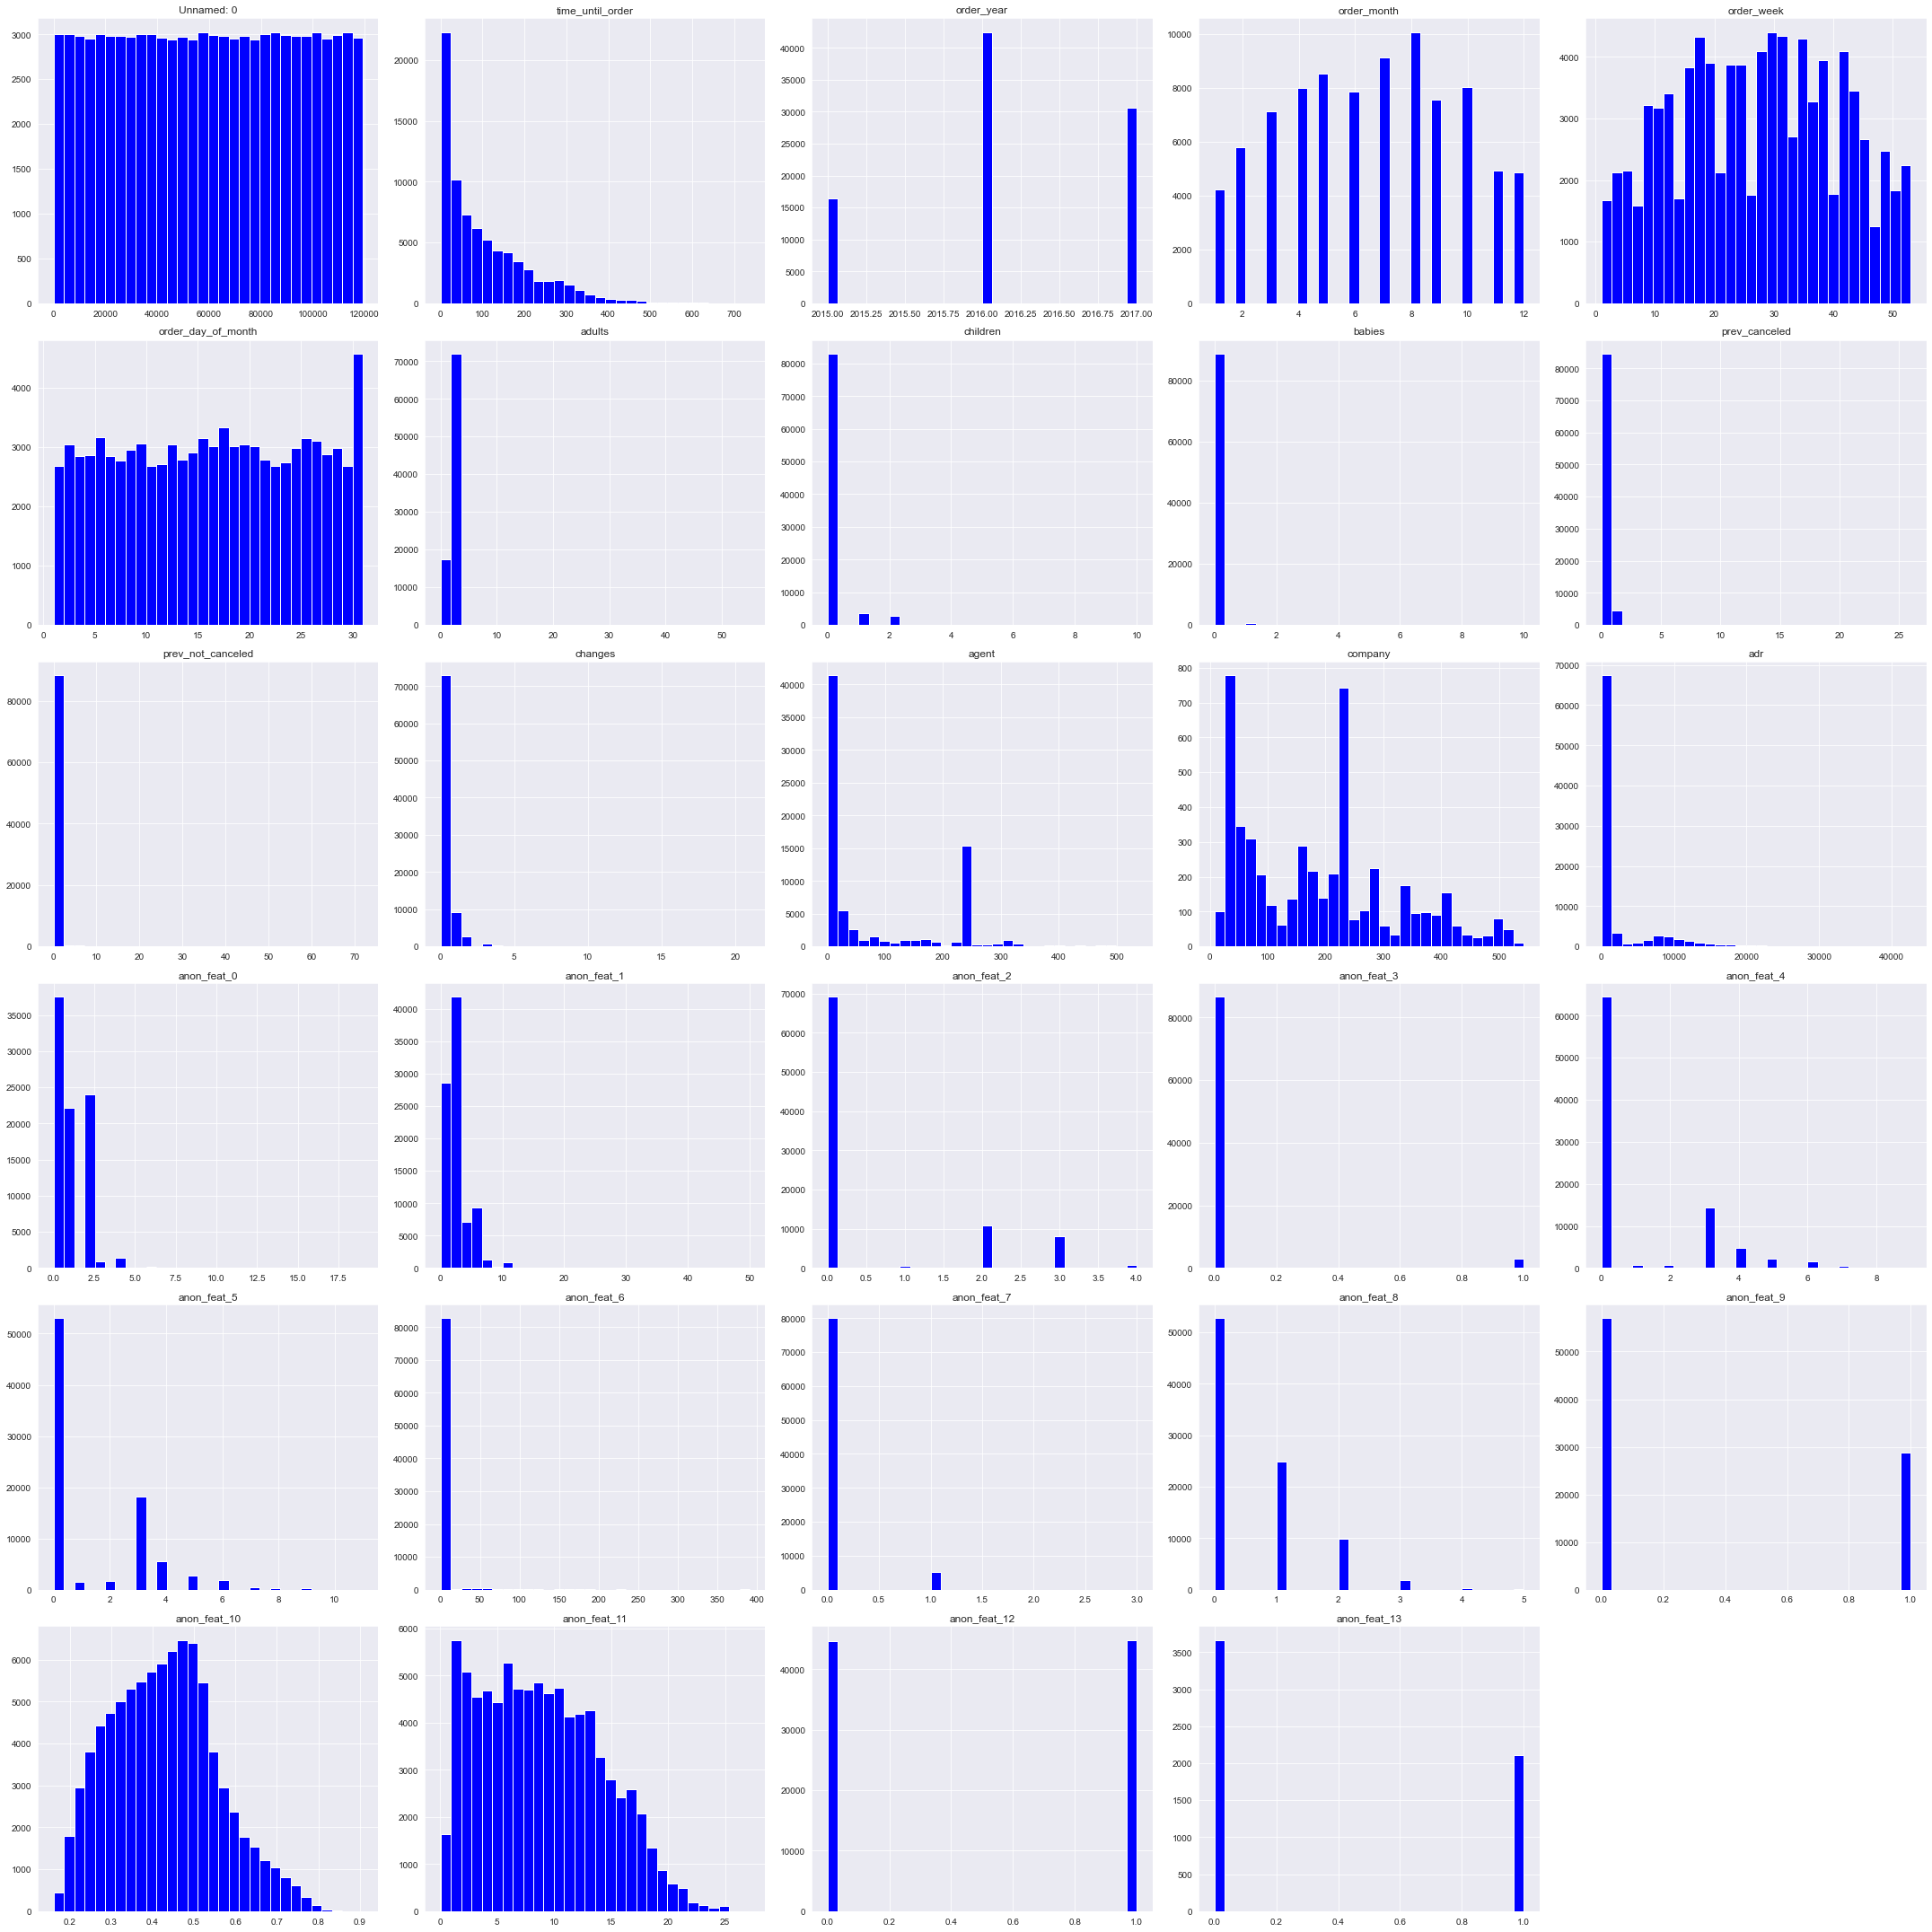

In [837]:
df.hist(figsize=(30,30), bins=30, color='blue')
plt.tight_layout()
plt.show()

## First Impression
### Correlation Matrix
This is a very first look over correlations. We would come back to this matrix later.

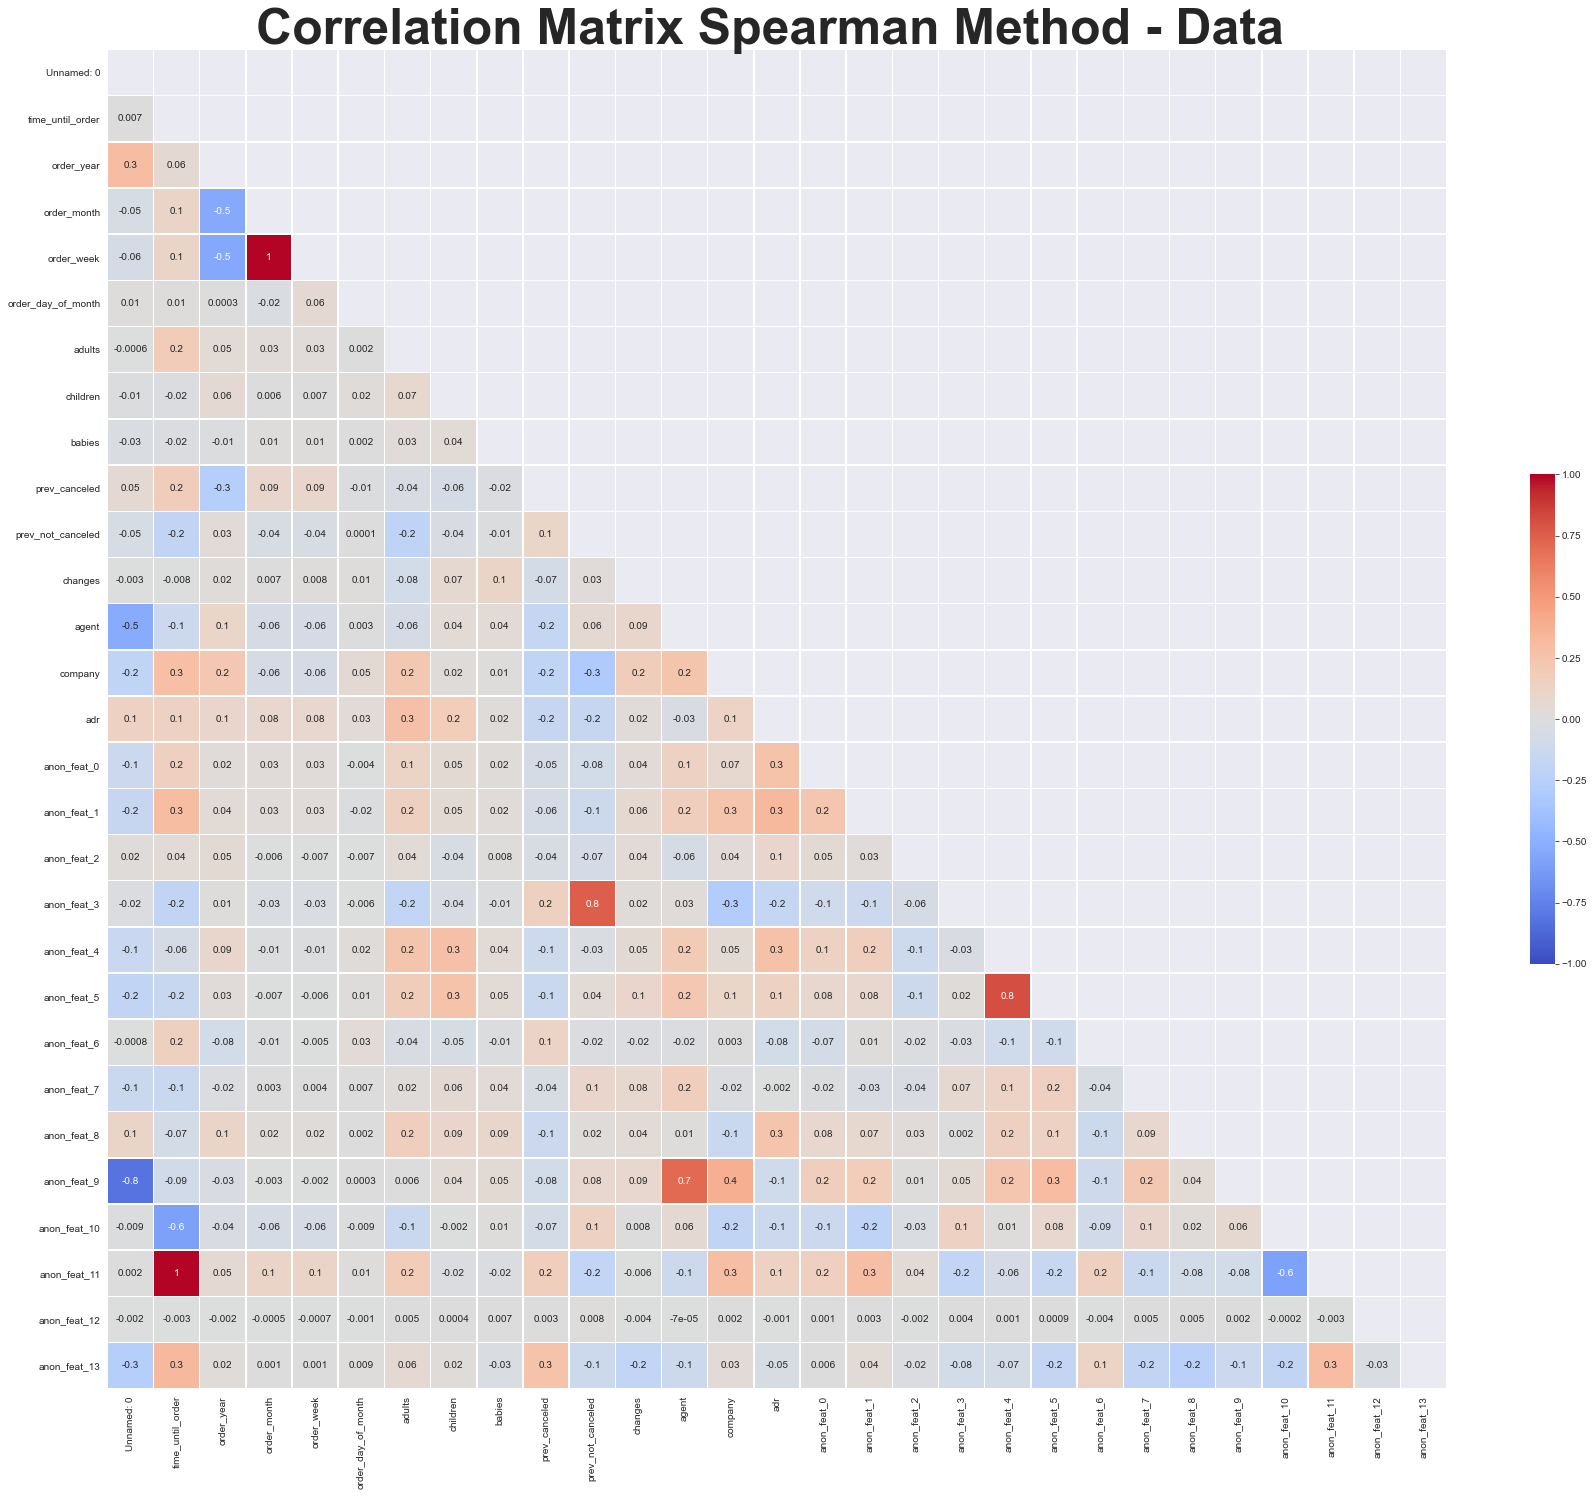

In [838]:
plt.figure(figsize=(30,30))
sns.set_style('darkgrid')
corr=df.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr, dtype=np.bool))
heat = sns.heatmap(corr, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'coolwarm', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":10},)
plt.title("Correlation Matrix Spearman Method - Data ",size=50, weight='bold')
plt.show()

### Analyzing the Correlation Matrix
#### From the Heatmap
Those are the top correlating values, above 55% of correlation.

In [839]:
corr = corr[corr>=0.55]
corr = corr.abs()
corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr

time_until_order   anon_feat_11    0.999476
order_month        order_week      0.995450
anon_feat_4        anon_feat_5     0.813804
prev_not_canceled  anon_feat_3     0.755504
agent              anon_feat_9     0.713712
dtype: float64

We have recognized a few suggested correlations:
<li>strong positive correlation between
<li>anon feature 11 - time until order
<li>agent - anon feat 9
<li>anon feature 5 - anon feature 4
of course we can discard order month and order week.

## Creating New Features #TODO check if this legit
We have decided that a few manipulations can be done on the features from the begining.
We think some features can be discarded  completely, and some new ones should be created.
Features to drop:
<li>
<li>
<li>
Features to create:
<li> Season - by year's months.
<li>
<li>

In [840]:
# Creating seasons
seasons = {1: "Spring", 2: "Summer", 3:"Autumn", 4: "Winter"}
df['season'] = df['order_month'].apply(month_num_season)

In [841]:
# Creating "ordered in advance" feature

# df['ordered_in_advance'] = df['time_until_order'] > 250 #TODO That looks very smart to me, but maybe not here

In [842]:
# Creating "has_kids" feature
df['has_kids'] = df['children'] > 0
df['has_kids'] = df['has_kids'].astype(int)

In [843]:
# Early Predictions and Ideas
## Exploring New Features

##Visualisation of the Data
### Seasons vs number of orders

Text(0, 0.5, 'Count')

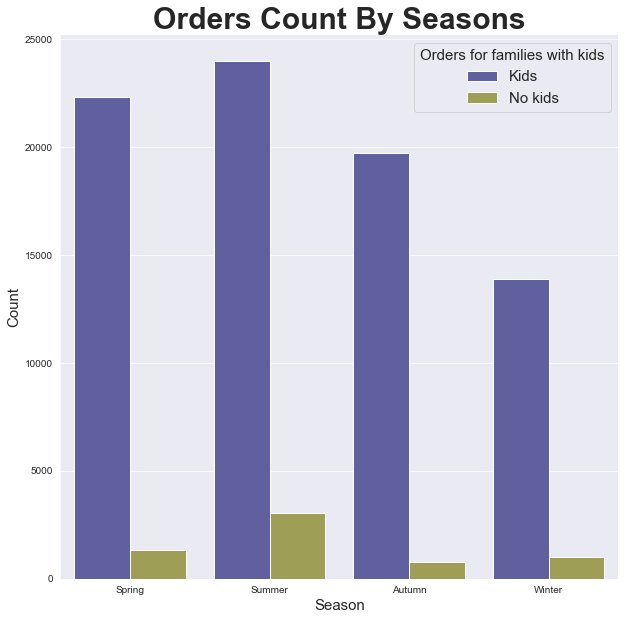

In [844]:
labels = [sea for sea in seasons.values()]
sns.set_style('darkgrid')
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.countplot(x='season', hue='has_kids', data= df, palette='gist_stern',
                    orient = 'v')
bar.set_xticklabels(labels)
sns.despine()
bar.legend(title='Orders for families with kids', labels=['Kids', 'No kids']
           ,loc='upper right',
           fontsize=15, title_fontsize=15)
bar.set_title('Orders Count By Seasons', weight='bold', fontsize=30)
bar.set_xlabel('Season', fontsize=15)
bar.set_ylabel('Count', fontsize=15)

### Kids Number vs order month

Text(0, 0.5, '')

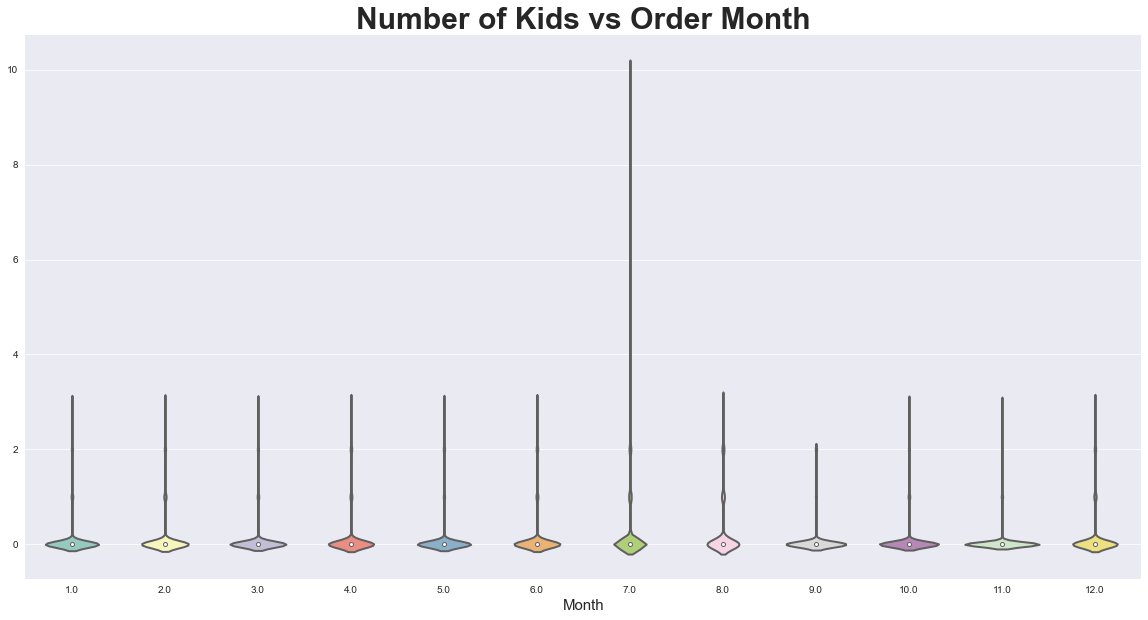

In [845]:
plt.figure(figsize=(20,10))
sns.violinplot(x='order_month', y ='children', data=df, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Number of Kids vs Order Month', weight='bold',
          fontsize=30)
plt.xlabel('Month', fontsize=15)
plt.ylabel('', fontsize=15)

### Kids Number vs Days Before Order

### Orders Count by Years

Text(0, 0.5, 'Count')

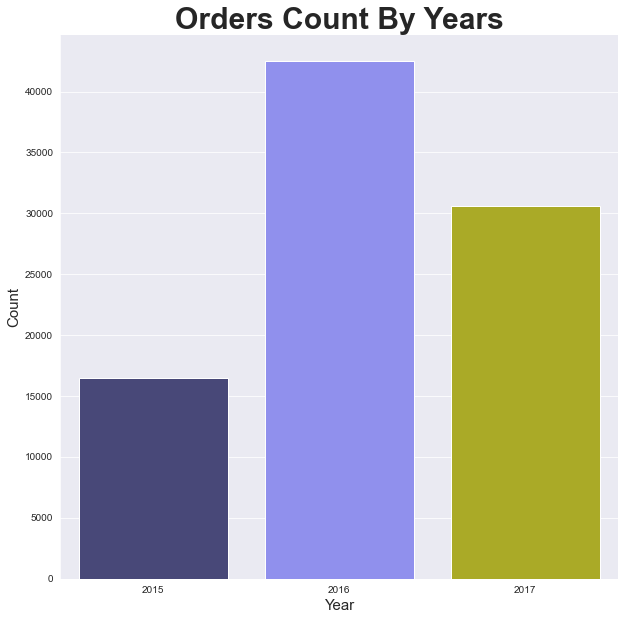

In [846]:
sns.set_style('darkgrid')
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.countplot(x='order_year', data= df, palette='gist_stern',
                    orient = 'v')
sns.despine()
bar.set_title('Orders Count By Years', weight='bold', fontsize=30)
bar.set_xlabel('Year', fontsize=15)
bar.set_ylabel('Count', fontsize=15)

### anon_feat 12 Distribution

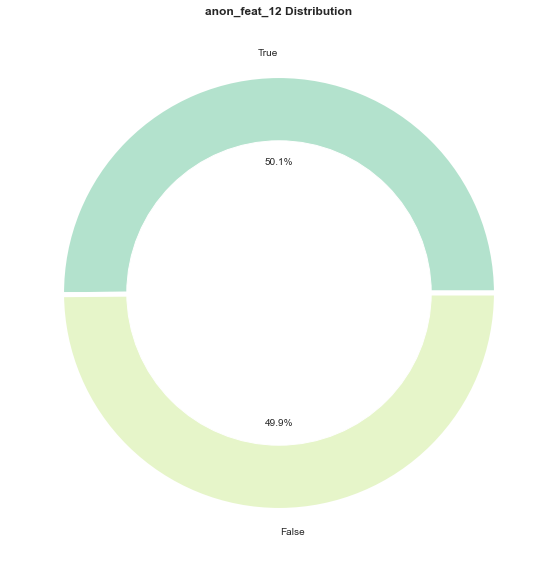

In [847]:
size = df['anon_feat_12'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
labels= ['True', 'False']
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, colors=colors, labels=labels,
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
        autopct="%.1f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('anon_feat_12 Distribution', weight='bold')
plt.show()

###  Prev Canceled Effect on Changes made

###  Top 10 Countries

Text(0, 0.5, 'Count')

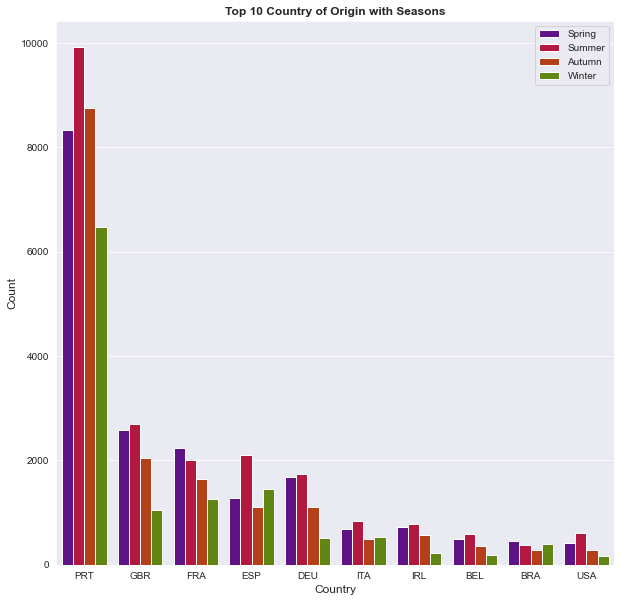

In [848]:
fig, bar = plt.subplots(figsize = (10,10))
sns.countplot(x='country',hue='season', data=df,
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin with Seasons', weight='bold')
plt.legend(labels=[season for season in seasons.values()])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

###  PLACEHOLDER

### Order Type

C:\Users\Guy Dahan\.conda\envs\Repo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

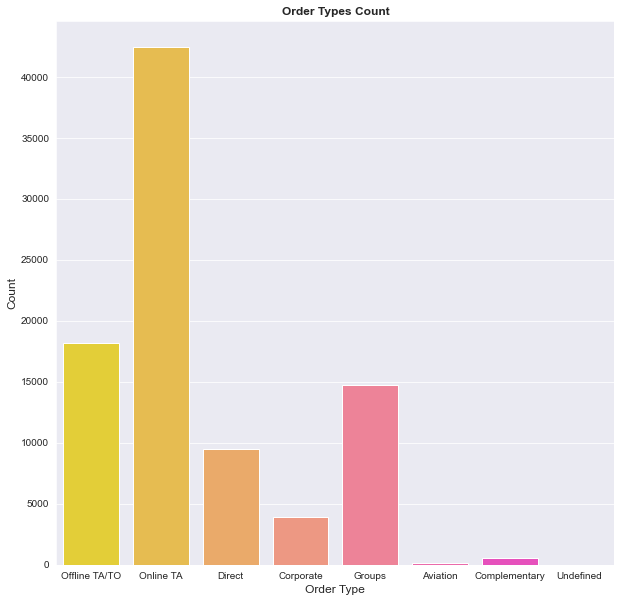

In [849]:
fig, bar = plt.subplots(figsize = (10,10))
sns.countplot(df['order_type'], palette='spring_r')
plt.title('Order Types Count', weight='bold')
plt.xlabel('Order Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Part 2: Preprocessing
## Answers for Part 2 questions
<br>
1. People who have deleted their orders more than 20 times.
  family with 10 kids that ordered a hotel
  -those cases are possible but they are outliers, therefore, we moved only the features that have more than 50% missing values
<br>
2. The data is not scaled.  scaling is essential for machine learning algorithms that calculate distances between data.
 If not scale, the feature with a higher value range starts dominating when calculating distances.
<br>
3. There are 253577 missing values in the dataframe. we chose to move only the features that with more than 50% missing values
have
<br>
4. The problem has more than 30  features for each row. big dimensionality can affect the predictions' accuracy.

## Feature Engineering

### Handling nan Data

First let's see how much is actually missing:

Text(0.5, 1.0, 'Missing Data')

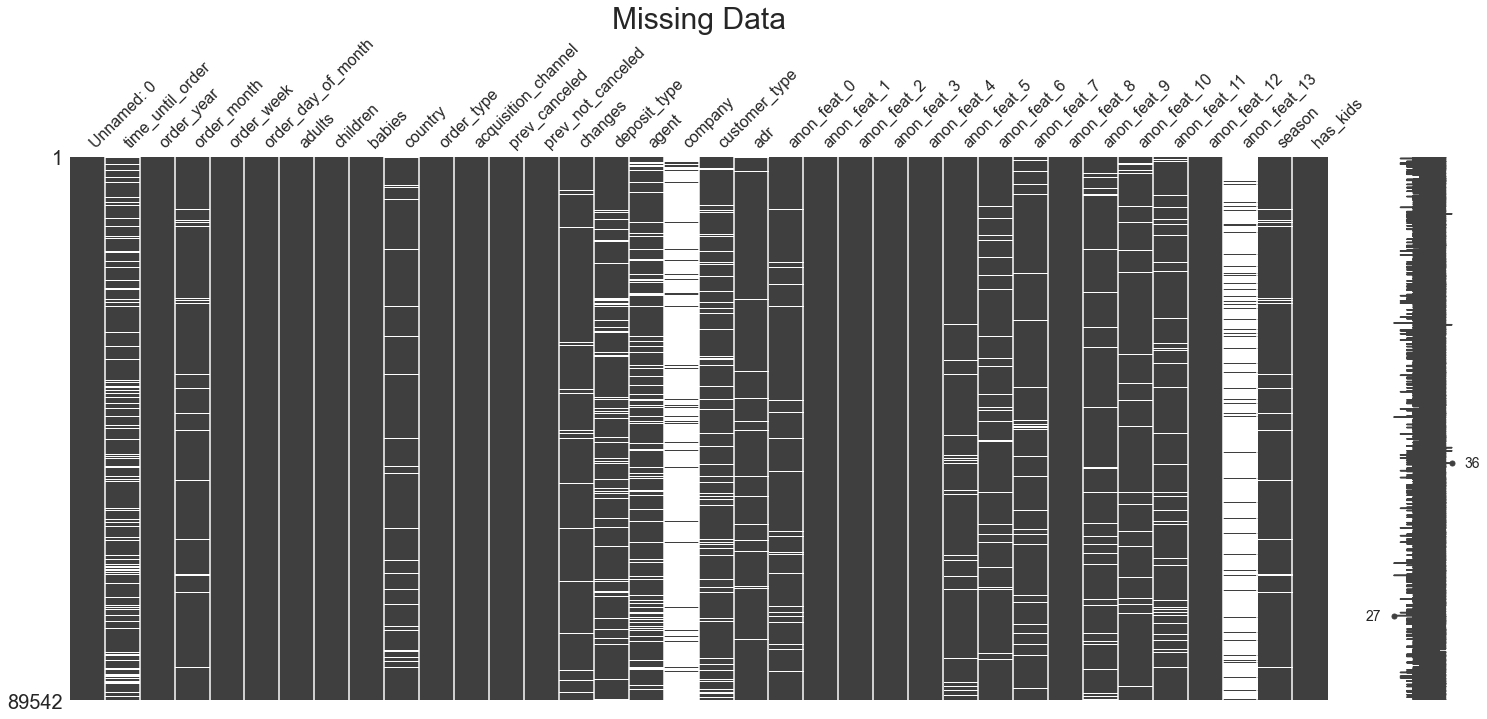

In [850]:
msno.matrix(df)
plt.title('Missing Data', fontsize=30)

We also chose to remove features of more than 50% nulls.

In [851]:
# drop columns of high "null percent"
drop_col = df.isnull().sum().divide(df.shape[0])
drop_col = list(drop_col[drop_col>0.5].index)
df = df.drop(drop_col, axis='columns')

After removing those problematic values we need to examine what is left:

In [852]:
df.isnull().sum().divide(df.shape[0]).round(8).astype(str) + "%"

Unnamed: 0                    0.0%
time_until_order       0.14162069%
order_year                    0.0%
order_month            0.03835072%
order_week                    0.0%
order_day_of_month            0.0%
adults                        0.0%
children                4.467e-05%
babies                        0.0%
country                0.04848004%
order_type                    0.0%
acquisition_channel           0.0%
prev_canceled                 0.0%
prev_not_canceled             0.0%
changes                0.03883094%
deposit_type            0.1005785%
agent                  0.13620424%
customer_type           0.1105068%
adr                    0.03331398%
anon_feat_0            0.03775882%
anon_feat_1                   0.0%
anon_feat_2                   0.0%
anon_feat_3                   0.0%
anon_feat_4                   0.0%
anon_feat_5            0.04502915%
anon_feat_6             0.0472739%
anon_feat_7            0.04744142%
anon_feat_8                   0.0%
anon_feat_9         

We can observe that the missing values are a very small percent of the data. We searched for the
most common values and used it to fill the missing

In [853]:
df.mode().head(1).squeeze()

Unnamed: 0                      0
time_until_order              0.0
order_year                 2016.0
order_month                   8.0
order_week                   33.0
order_day_of_month           17.0
adults                        2.0
children                      0.0
babies                        0.0
country                       PRT
order_type              Online TA
acquisition_channel         TA/TO
prev_canceled                 0.0
prev_not_canceled             0.0
changes                       0.0
deposit_type           No Deposit
agent                         9.0
customer_type           Transient
adr                          62.0
anon_feat_0                   0.0
anon_feat_1                   2.0
anon_feat_2                   0.0
anon_feat_3                   0.0
anon_feat_4                   0.0
anon_feat_5                   0.0
anon_feat_6                   0.0
anon_feat_7                   0.0
anon_feat_8                   0.0
anon_feat_9                   0.0
anon_feat_10  

Text(0.5, 1.0, 'Missing Data')

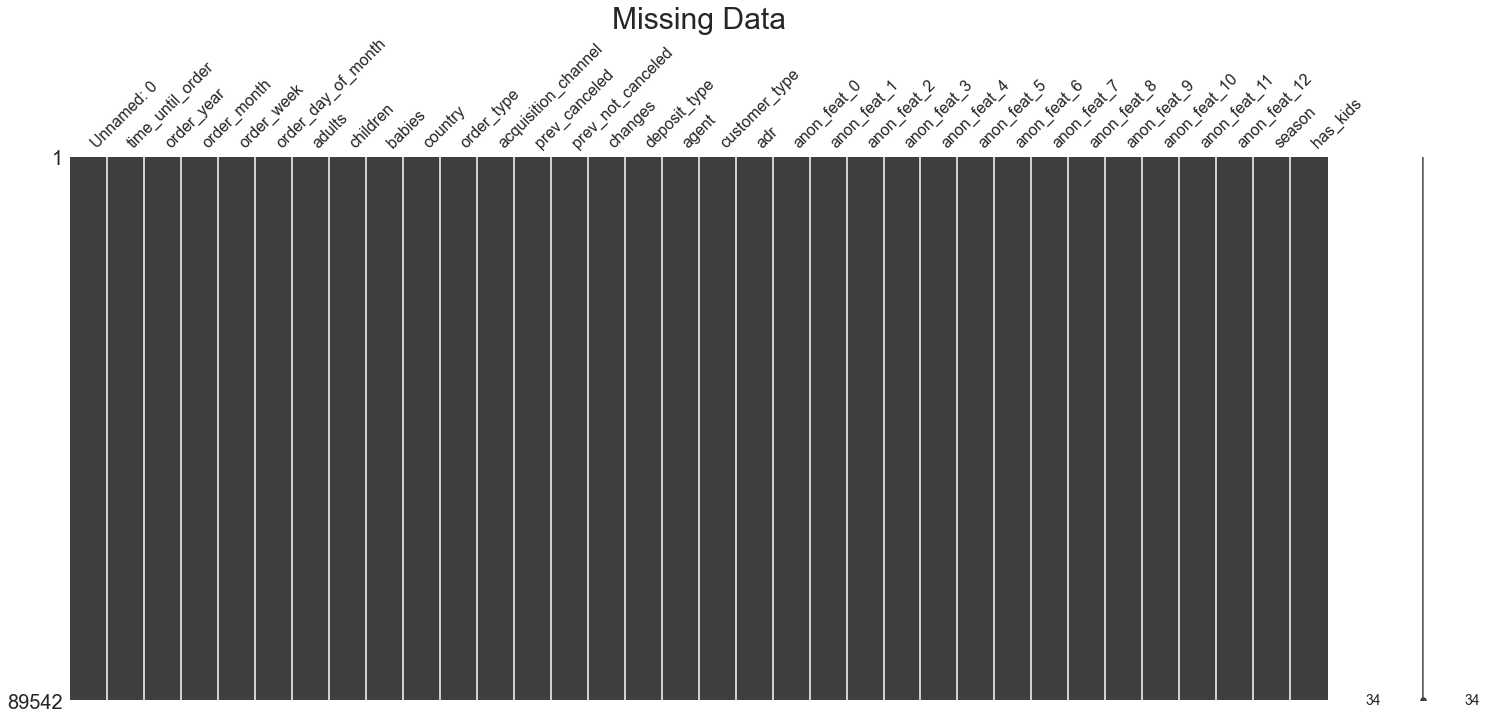

In [854]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for feature in df.columns:
    imp.fit(df[feature].values.reshape(-1,1))
    df[feature] = imp.transform(df[feature].values.reshape(-1,1))
msno.matrix(df)
plt.title('Missing Data', fontsize=30)

### Dealing with Categorical Data

In [855]:
# Categorical Data handling

categorical_cols = ['country', 'order_type', 'acquisition_channel',
                    'customer_type','deposit_type', 'prev_canceled',
                    'prev_not_canceled', 'anon_feat_0', 'anon_feat_3',
                    'anon_feat_9', 'anon_feat_12', ]
numerical_cols = ['Unnamed: 0', 'time_until_order', 'order_year',
                  'order_month', 'order_week', 'order_day_of_month',
                  'adults', 'children', 'babies',
                  'anon_feat_2', 'anon_feat_4', 'anon_feat_5',
                  'anon_feat_6', 'anon_feat_7', 'anon_feat_8',
                  'anon_feat_10', 'anon_feat_11', 'season', 'has_kids']
# Method 1: Encoding by base 8 (adds features)

# encoder= ce.BaseNEncoder(cols=categorical_cols, base=8) ## another method for categorizing, we need to choose
# df = encoder.fit_transform(df)

# Method 2: labelling

labelencoder = LabelEncoder()
for feature in categorical_cols:
    df[feature] = labelencoder.fit_transform(df[feature])


df_categorical = df[categorical_cols]
df_numerical = df[numerical_cols]

##Another Look on Correlation Matrices
### Categorical Features Correlation Matrix

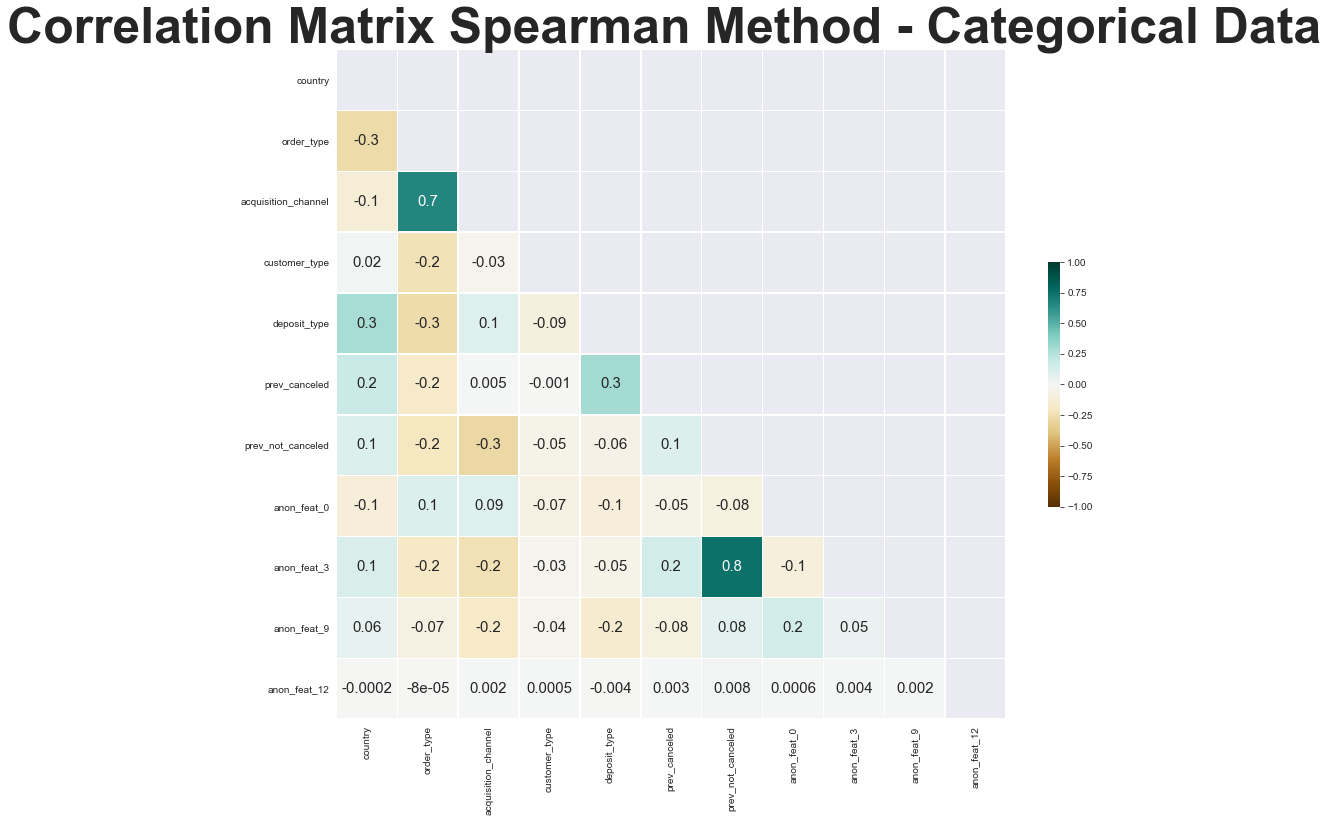

In [856]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
corr_cat = df_categorical.corr(method='spearman')
mask_corr = np.triu(np.ones_like(corr_cat, dtype=np.bool))
heat = sns.heatmap(corr_cat, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'BrBG', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":15},)
plt.title("Correlation Matrix Spearman Method - Categorical Data ",size=50, weight='bold')
plt.show()

#### Top Correlations for Categorical Values

In [857]:
corr_cat = corr_cat[corr_cat>=0.55].abs()
corr_cat = (corr_cat.where(np.triu(np.ones(corr_cat.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr_cat

prev_not_canceled  anon_feat_3            0.755504
order_type         acquisition_channel    0.668108
dtype: float64

### Numerical Features Correlation Matrix

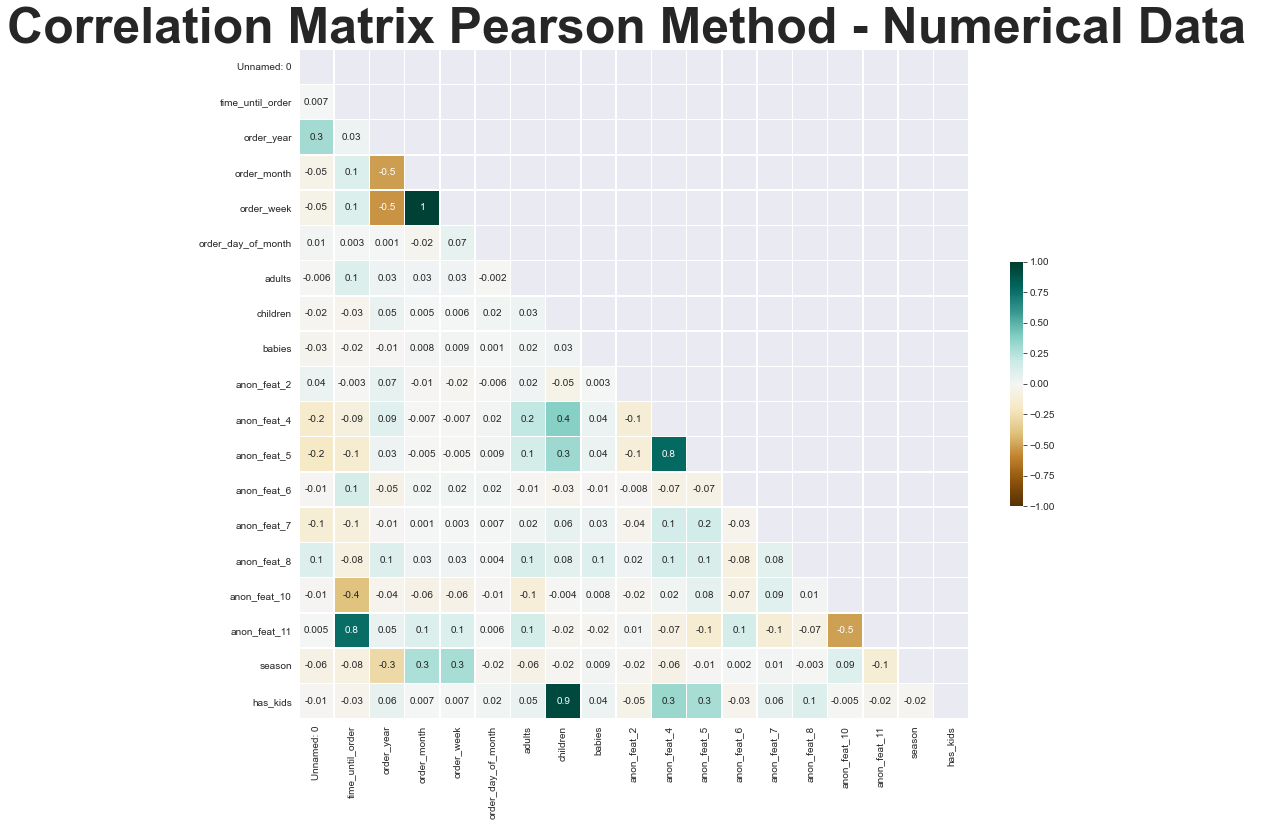

In [858]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
corr_num = df_numerical.corr(method='pearson')
mask_corr = np.triu(np.ones_like(corr_num, dtype=np.bool))
heat = sns.heatmap(corr_num, square=True,
            annot=True, fmt='.1g', linewidths=0.5,
            linecolor='white', cmap= 'BrBG', mask=mask_corr,
            vmin=-1, vmax=1, cbar_kws={'shrink': 0.3},
            annot_kws={"fontsize":10},)
plt.title("Correlation Matrix Pearson Method - Numerical Data ",size=50, weight='bold')
plt.show()

#### Top Correlations for Numerical Values

In [859]:
corr_num = corr_num[corr_num>=0.55].abs()
corr_num = (corr_num.where(np.triu(np.ones(corr_num.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
corr_num

order_month       order_week      0.971758
children          has_kids        0.935310
anon_feat_4       anon_feat_5     0.786298
time_until_order  anon_feat_11    0.768535
dtype: float64

## Choosing Features to Scale
After finishing all the feature engineering, just before splitting the data to
train sets, we can choose to scale only some features for the modeling.

In [860]:
# Remove Values here to remove from scaling

features_to_scale = ['Unnamed: 0',
                     'time_until_order',
                     'order_year',
                     'order_month',
                     'order_week',
                     'order_day_of_month',
                     'adults',
                     'children',
                     'babies',
                     'country_0',
                     'country_1',
                     'country_2',
                     'country_3',
                     'order_type_0',
                     'order_type_1',
                     'acquisition_channel_0',
                     'acquisition_channel_1',
                     'prev_canceled',
                     'prev_not_canceled',
                     'changes',
                     'deposit_type_0',
                     'deposit_type_1',
                     'agent',
                     'customer_type_0',
                     'customer_type_1',
                     'adr',
                     'anon_feat_0',
                     'anon_feat_1',
                     'anon_feat_2',
                     'anon_feat_3',
                     'anon_feat_4',
                     'anon_feat_5',
                     'anon_feat_6',
                     'anon_feat_7',
                     'anon_feat_8',
                     'anon_feat_9',
                     'anon_feat_10',
                     'anon_feat_11',
                     'anon_feat_12',
                     'season',
                     'ordered_in_advance',
                     'has_kids']

# Part 3: Modelling
## Searching the Correct Parameters

In [861]:
# df_tune = df
# y = df.iloc[:,1]
# X = pd.concat([df.iloc[:,0],df_tune.iloc[:,2:34]], axis=1)

In [862]:
# params = {
#     'criterion': 'giny',
#     'learning_rate': 0.01,
#     'max_depth': 5,
#     'n_estimators': 100,
#     'objective': 'binary:logistic',
# }
# model = XGBClassifier(parameters=params)
# # fit the model
# model.fit(X, y)
# # perform permutation importance
# result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
# sorted_idx = result.importances_mean.argsort()

In [863]:
# for i,v in enumerate(sorted_idx):
#     print('Feature: %0d, Score: %.5f' % (i,v))

## Splitting the Data
At this stage we would like to split the data before further manipulations are done.

In [864]:
# The training Data

y= pd.read_csv('Example/label_data.csv')
y['cancelation'] = y["cancelation"].astype(int)

#Splitting the data

X_train, X_test, y_train, y_test = \
    train_test_split(df, y, test_size=0.33, random_state=42)

## Scaling the Data

In [865]:
x = X_train
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

## Exploring the Train Data Correlations with y

## PCA Testing - Dimensionality

In [866]:
pca = PCA()
data_for_PCA = (x-x.mean()/(x.std()))
# drop = [9, 15, 20, 23] # For case of using category encoding
# data_for_PCA.drop(data_for_PCA.columns[drop], axis='columns', inplace=True) # For case of using category encoding
X_train_pca = pca.fit_transform(data_for_PCA)

Text(0.5, 0, 'Dimensions')

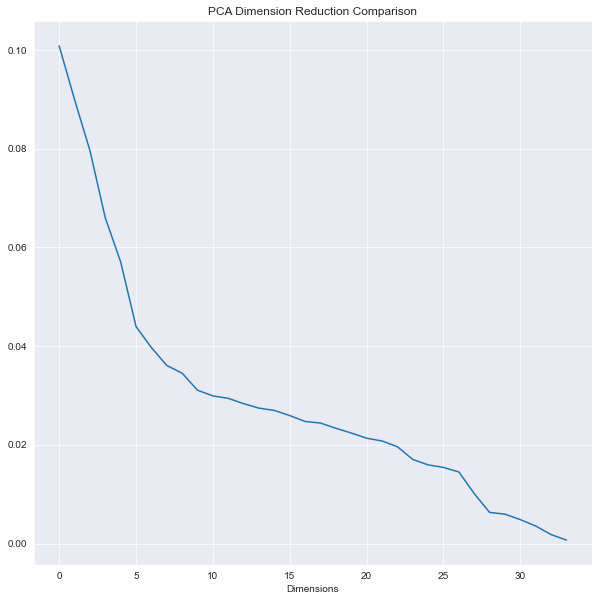

In [867]:
#Show the PCA comparison

plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA Dimension Reduction Comparison')
plt.xlabel('Dimensions')

## Classifiers
We are going to run the following classifiers:

In [868]:
# clfs = [LogisticRegression()] #KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

In [869]:
# for clf in clfs:
#     clf.fit(X_train, y_train)
#     plot_roc_curve(clf, X_train, y_train)
#     plt.show()
